In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1640733404006' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book2_16323263205690&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1640733404006');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [4]:
%%HTML
<div class='tableauPlaceholder' id='viz1640734710639' style='position: relative'><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16407342150120&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1640734710639');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Python EDA

Transaction Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15
import numpy as np

In [2]:
transactions = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv')
#transactions['Time'] = np.arange(len(transactions.index))
#transactions = transactions.drop(columns=["store_nbr"])

In [443]:
transactions.head()


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [166]:
print(transactions.iloc[0,2])

770


Consolidate all of the sales for each date

In [384]:
transactions_dates = transactions['date'].drop_duplicates()
transactions_dates[:5]


0      2013-01-01
1      2013-01-02
47     2013-01-03
93     2013-01-04
139    2013-01-05
Name: date, dtype: object

In [385]:

transactions_cons = transactions.values.tolist()
transactions_cons[:5]

[['2013-01-01', 25, 770],
 ['2013-01-02', 1, 2111],
 ['2013-01-02', 2, 2358],
 ['2013-01-02', 3, 3487],
 ['2013-01-02', 4, 1922]]

In [415]:
trans_by_date = {}

for date in transactions_dates:
    trans_by_date[date] = 0

for date in transactions_cons:
    trans_by_date[date[0]] = trans_by_date[date[0]] + date[2]




In [387]:
tran_values = []
for values in trans_by_date:
    tran_values.append(trans_by_date[values])
print(tran_values[:5])

[770, 93215, 78504, 78494, 93573]


In [395]:
transactions_df = pd.DataFrame()
transactions_df['Dates'] = transactions_dates
transactions_df['Transactions'] = tran_values
#df['Time'] = np.arange(len(df.index))
transactions_df['Time'] = np.arange(len(transactions_df.index))
#transactions_df = transactions_df.drop(columns=['index'])
transactions_df = transactions_df.reset_index(drop=True)
transactions_df.head()

,Dates,Transactions,Time
0,2013-01-01,770,0
1,2013-01-02,93215,1
2,2013-01-03,78504,2
3,2013-01-04,78494,3
4,2013-01-05,93573,4


<AxesSubplot:xlabel='Time'>

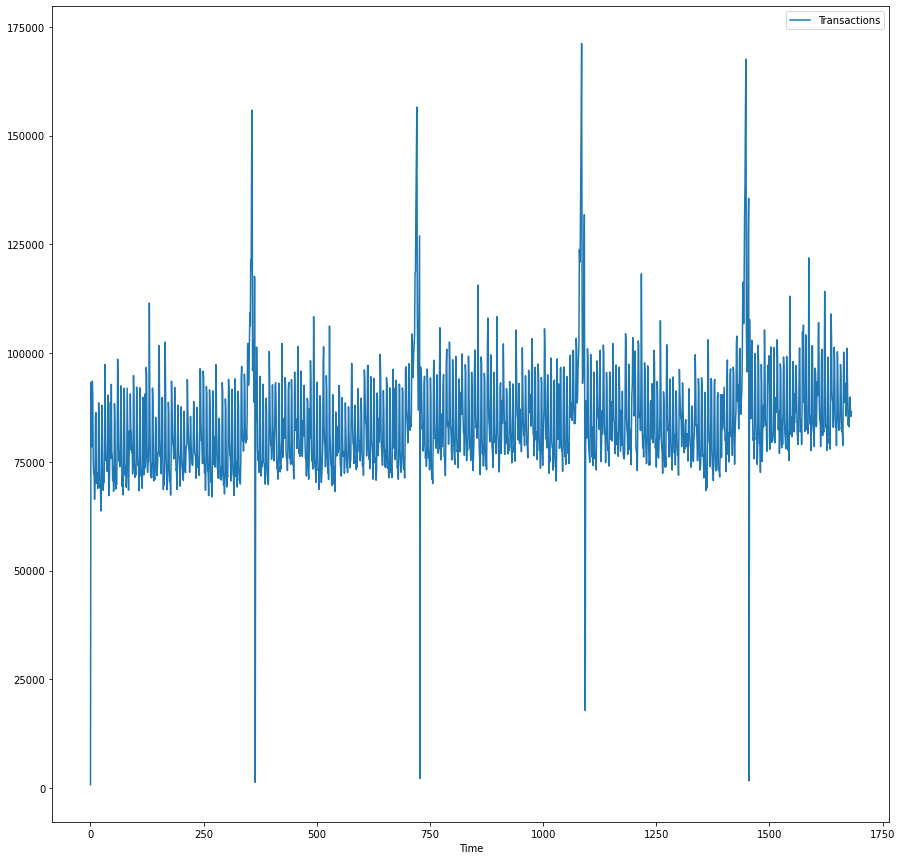

In [238]:
transactions_df.plot(x="Time")

LAG FEATURES

In [396]:
#df['Lag_1'] = df['Hardcover'].shift(1)
#df = df.reindex(columns=['Hardcover', 'Lag_1'])

#df.head()

transactions_df_lag = transactions_df
transactions_df_lag['Lag_1'] = transactions_df_lag['Transactions'].shift(1)
transactions_df_lag = transactions_df_lag.reindex(columns=['Transactions', 'Lag_1'])
transactions_df_lag = transactions_df_lag.reset_index(drop=True)
transactions_df_lag.head()


,Transactions,Lag_1
0,770,NaN
1,93215,770.0
2,78504,93215.0
3,78494,78504.0
4,93573,78494.0


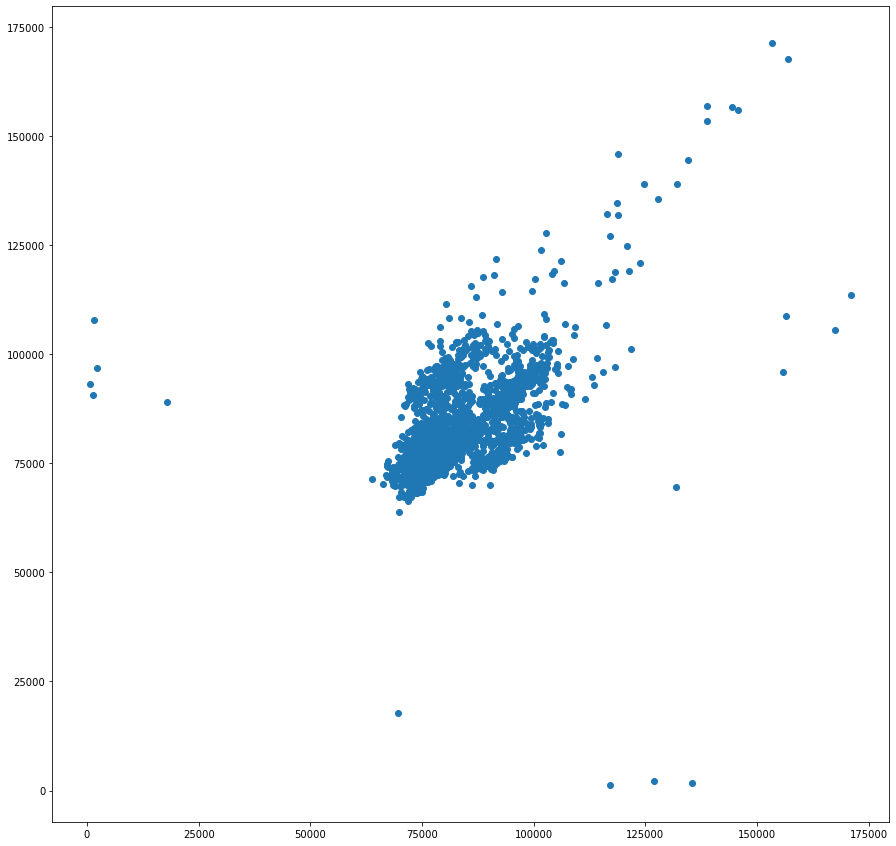

In [267]:

plt.scatter(x=transactions_df_lag['Lag_1'], y=transactions_df_lag['Transactions'])


Linear Regression

(1682, 1)


Text(0.5, 1.0, 'Time Plot of Total Transactions')

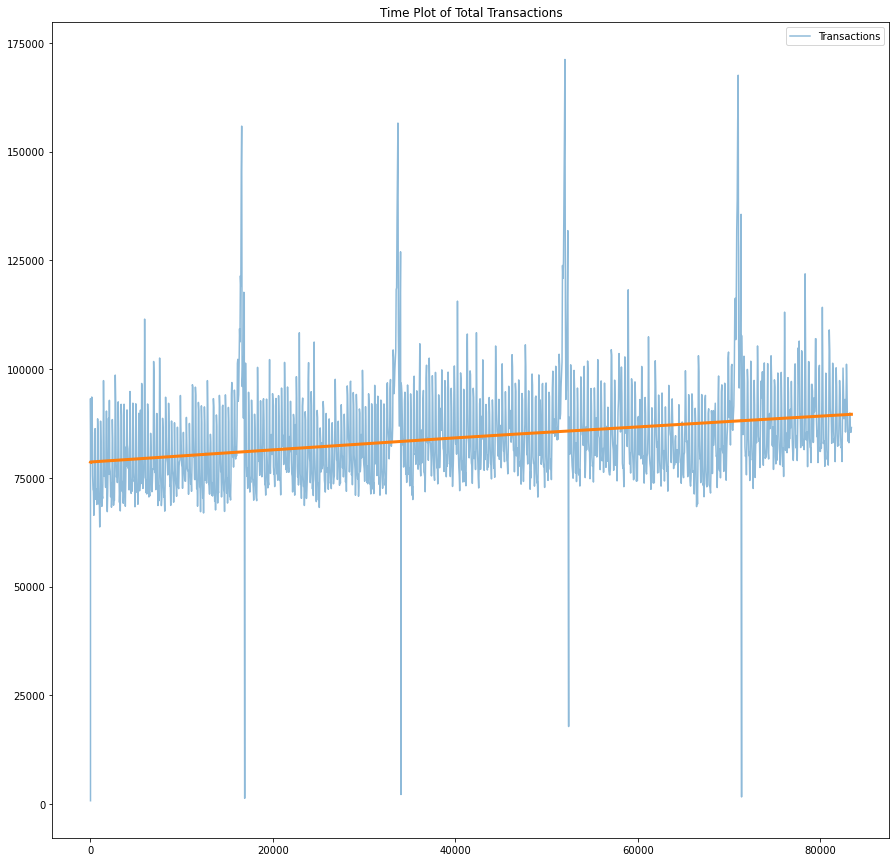

In [301]:
from sklearn.linear_model import LinearRegression

transactions_df.reset_index()

#Training data
X = transactions_df.loc[:, ['Time']] #features
y = transactions_df.loc[:, ['Transactions']]#target

print(X.shape)

#Train the model
model = LinearRegression()

model.fit(X,y)

model_1d = [x[0] for x in model.predict(X)]

#print(model_1d)

#Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model_1d, index=X.index)

ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Transactions')


In [303]:
model.coef_

array([[6.52469305]])

In [414]:
#Training data
X = transactions_df_lag.loc[:, ['Lag_1']].dropna()  # features
y = transactions_df_lag.loc[:, 'Transactions']  # target
y, X = y.align(X, join='inner')

model = LinearRegression()
model.fit(X, y)

# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)




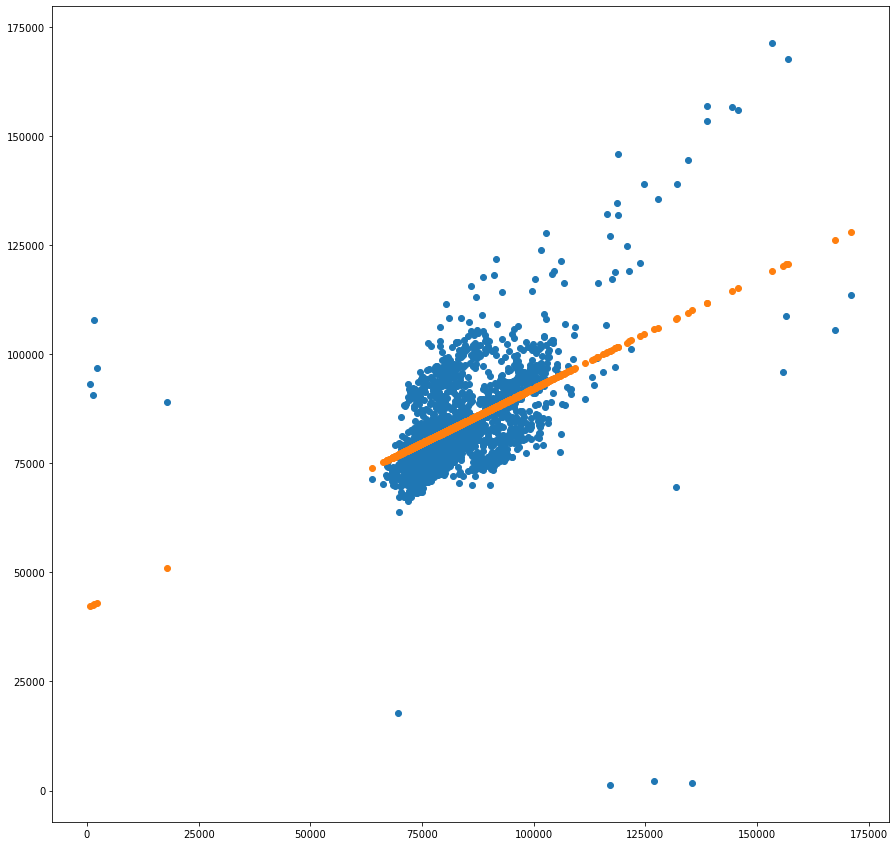

In [411]:
transactions_df_lag_X = transactions_df_lag['Lag_1'][1:]
transactions_df_lag_Y = transactions_df_lag['Transactions'][1:]
plt.scatter(x=transactions_df_lag_X, y=transactions_df_lag_Y)
plt.scatter(x=transactions_df_lag_X, y=y_pred)

EDA of Training Data

In [3]:
train = pd.read_csv('./store-sales-time-series-forecasting/train.csv')

In [4]:
train_one = train[train['store_nbr'] == 1] 
train_one = train_one
train_one.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
sales_dates = train['date'].drop_duplicates()
sales_cons = train_one.values.tolist()

sales_by_date = {}

for date_s in sales_dates:
    sales_by_date[date_s] = 0

#sales_by_date[date_s[4]] + date_s[4]

for date_s in sales_cons:
    sales_by_date[date_s[1]] = date_s[4] + sales_by_date[date_s[1]]
    
sales_one_values = []

for values in sales_by_date:
    sales_one_values.append(sales_by_date[values])
print(sales_one_values[:5])


[0.0, 7417.147999999999, 5873.244001, 5919.879001, 6318.78501]


In [6]:
sales_one_df = pd.DataFrame()
sales_one_df['dates'] = sales_dates
sales_one_df['sales'] = sales_one_values
sales_one_df['Time'] = np.arange(len(sales_one_df.index))
sales_one_df = sales_one_df.reset_index(drop=True)
sales_one_df.head()

,dates,sales,Time
0,2013-01-01,0.000000,0
1,2013-01-02,7417.148000,1
2,2013-01-03,5873.244001,2
3,2013-01-04,5919.879001,3
4,2013-01-05,6318.785010,4


<AxesSubplot:xlabel='Time'>

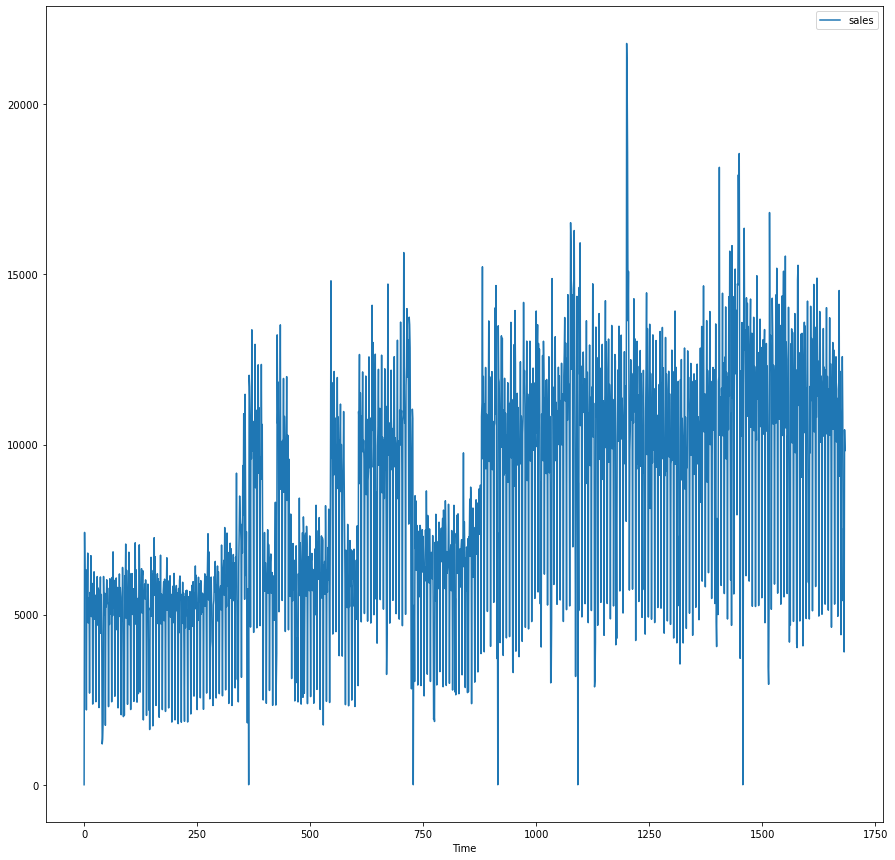

In [7]:
sales_one_df.plot(x="Time")

In [11]:
train_one_auto = train_one[train_one["family"] == "AUTOMOTIVE"]
train_one_auto.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0


<AxesSubplot:xlabel='date'>

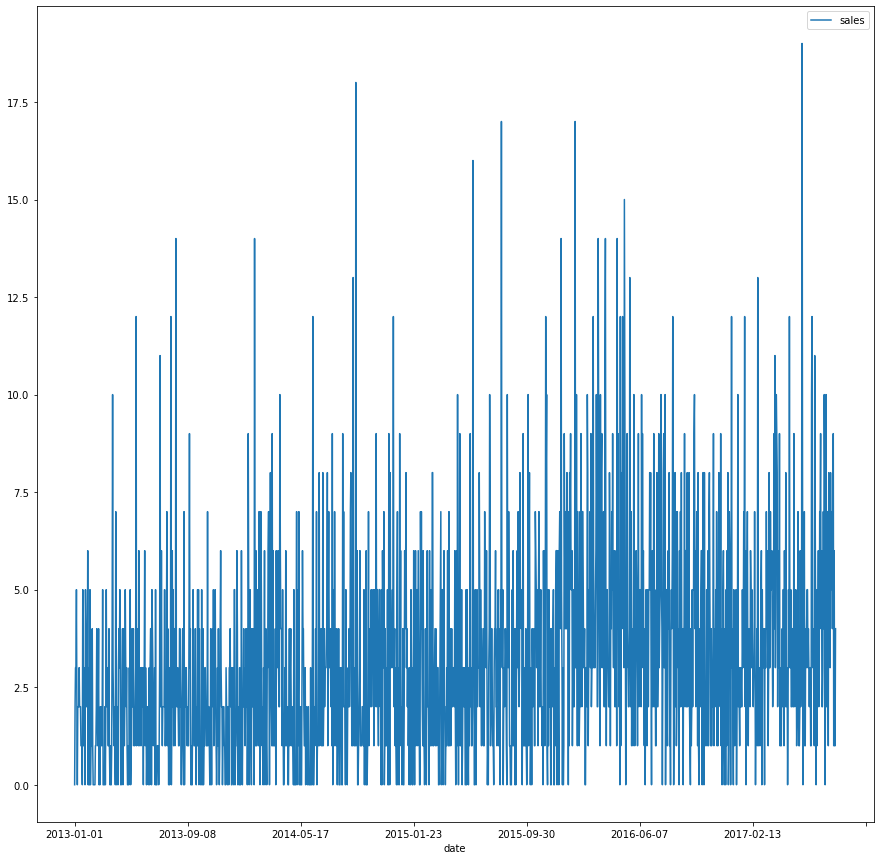

In [14]:
train_one_auto.plot(x='date', y = 'sales')

In [16]:
train_two = train[train['store_nbr'] == 2] 
train_two_auto = train_two[train_two["family"] == "AUTOMOTIVE"]
train_two_auto.head()

,id,date,store_nbr,family,sales,onpromotion
363,363,2013-01-01,2,AUTOMOTIVE,0.0,0
2145,2145,2013-01-02,2,AUTOMOTIVE,8.0,0
3927,3927,2013-01-03,2,AUTOMOTIVE,5.0,0
5709,5709,2013-01-04,2,AUTOMOTIVE,3.0,0
7491,7491,2013-01-05,2,AUTOMOTIVE,5.0,0


<AxesSubplot:xlabel='date'>

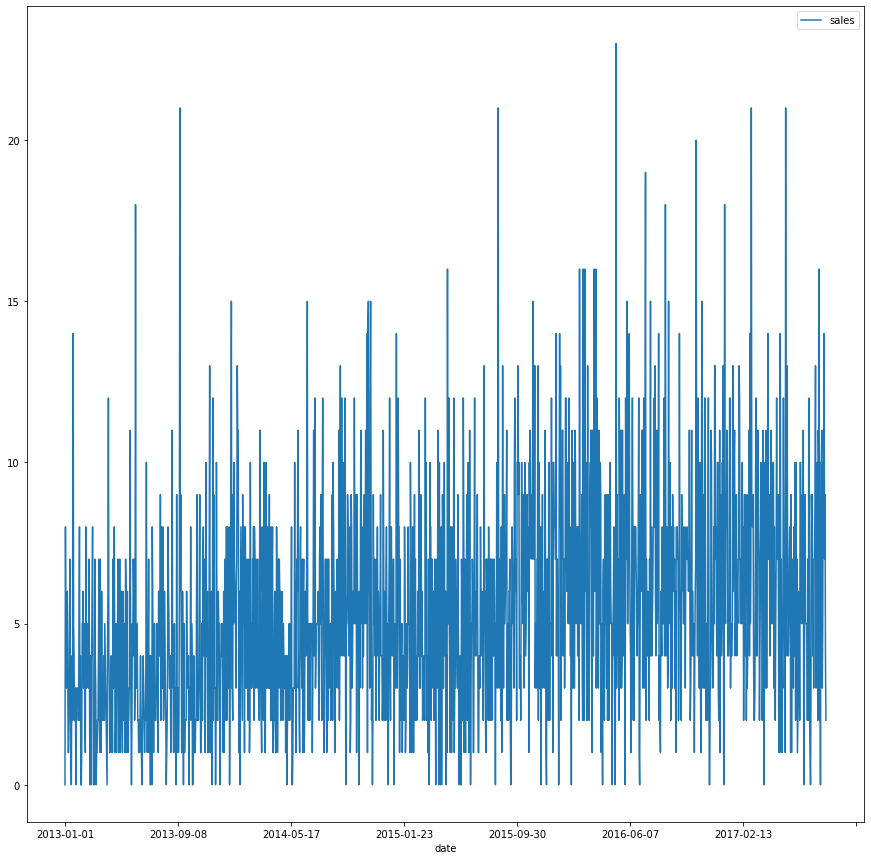

In [17]:
train_two_auto.plot(x='date', y = 'sales')

Create Test Model for Store_One_Automobile

In [18]:
train_one_auto['Time'] = np.arange(len(train_one_auto.index))
train_one_auto.head()

/var/folders/58/56zz96952058khs1zxtw5fs80000gn/T/ipykernel_28409/1518860382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_one_auto['Time'] = np.arange(len(train_one_auto.index))


,id,date,store_nbr,family,sales,onpromotion,Time
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1782,1782,2013-01-02,1,AUTOMOTIVE,2.0,0,1
3564,3564,2013-01-03,1,AUTOMOTIVE,3.0,0,2
5346,5346,2013-01-04,1,AUTOMOTIVE,3.0,0,3
7128,7128,2013-01-05,1,AUTOMOTIVE,5.0,0,4


In [22]:
model_train_one_auto = pd.DataFrame()
model_train_one_auto["date"] = train_one_auto["date"]
model_train_one_auto["sales"] = train_one_auto["sales"]
model_train_one_auto["Time"] = train_one_auto["Time"]
c.head()

,date,sales,Time
0,2013-01-01,0.0,0
1782,2013-01-02,2.0,1
3564,2013-01-03,3.0,2
5346,2013-01-04,3.0,3
7128,2013-01-05,5.0,4


Text(0.5, 1.0, 'Time Plot of Total Auto Sales Store One')

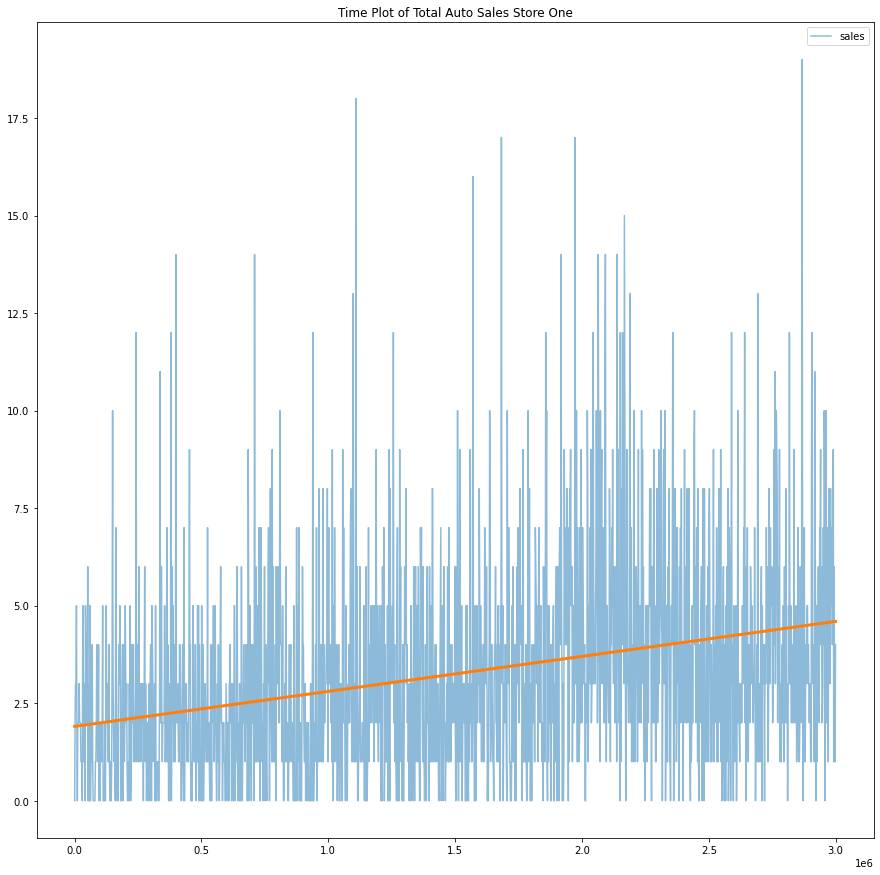

In [27]:
from sklearn.linear_model import LinearRegression

#Training data
X = model_train_one_auto.loc[:, ['Time']] #features
y = model_train_one_auto.loc[:, ['sales']]#target

#Train the model
model = LinearRegression()

model.fit(X,y)

model_1d = [x[0] for x in model.predict(X)]

#Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model_1d, index=X.index)

ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Auto Sales Store One')


In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, model_1d)

7.00715018991977